In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the attributes are catagorical.

In [ ]:
df.isnull().sum().sum()

0

There is no null value in the dataset.

In [ ]:
df.shape

(8124, 23)

In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

The class column is target and it has two clasification which describes if mushroom is poisonous or edible. In class column posionous is p and edible is e.

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='Count'>

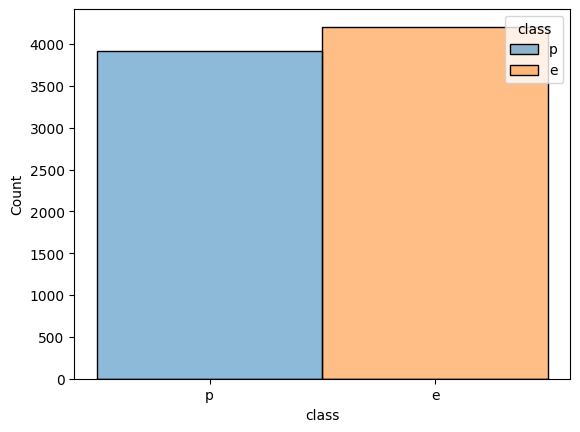

In [ ]:
sns.histplot(data=df, x='class', hue='class')

It shows here that the edible mushrooms have slightly more instances than the poisonous mushrooms.

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
X = df.drop(['class'],axis=1)
y = df['class']

For y variable encoding is done as Poisonous = p -> 1 Edible = e -> 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape , X_test.shape

((6499, 22), (1625, 22))

In [ ]:
y_train.shape , y_test.shape

((6499,), (1625,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.metrics import accuracy_score

[Text(0.39903846153846156, 0.9375, 'x[8] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3356, 3143]'),
 Text(0.19230769230769232, 0.8125, 'x[20] <= 3.5\ngini = 0.272\nsamples = 2644\nvalue = [430, 2214]'),
 Text(0.07692307692307693, 0.6875, 'x[19] <= 1.5\ngini = 0.22\nsamples = 460\nvalue = [402, 58]'),
 Text(0.038461538461538464, 0.5625, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.11538461538461539, 0.5625, 'x[21] <= 0.5\ngini = 0.082\nsamples = 420\nvalue = [402, 18]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 402\nvalue = [402, 0]'),
 Text(0.3076923076923077, 0.6875, 'x[10] <= 2.0\ngini = 0.025\nsamples = 2184\nvalue = [28, 2156]'),
 Text(0.2692307692307692, 0.5625, 'x[12] <= 0.5\ngini = 0.009\nsamples = 2166\nvalue = [10, 2156]'),
 Text(0.23076923076923078, 0.4375, 'x[21] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.19230769230769232, 0.3125, 'gini = 0.0\ns

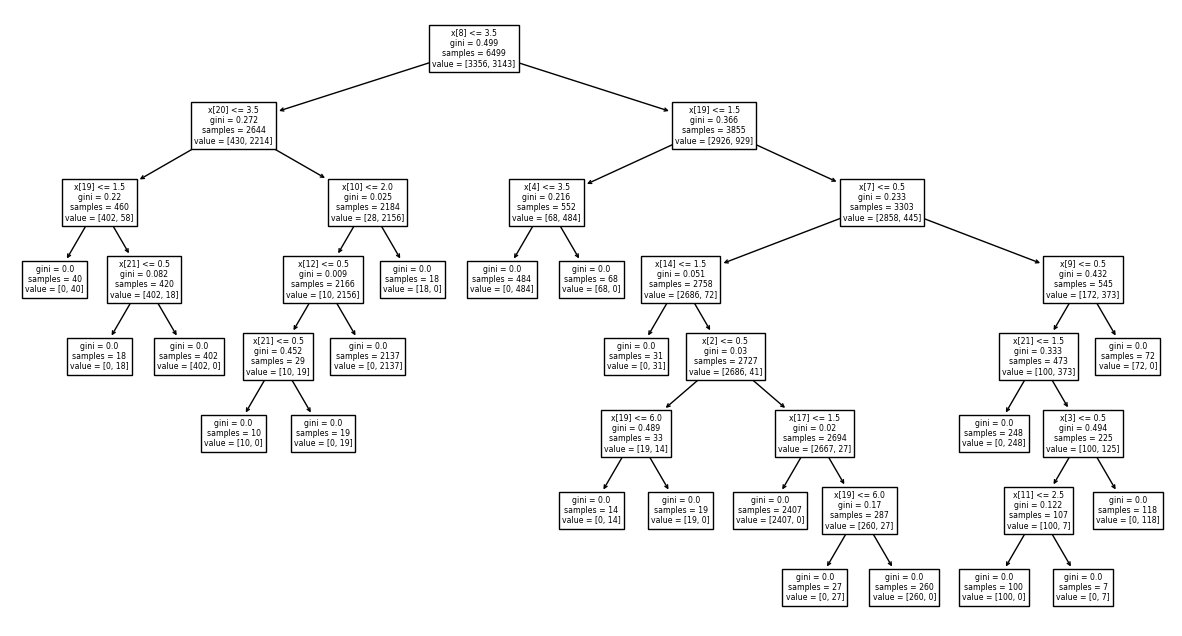

In [ ]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=42)


# fit the model
clf_gini.fit(X_train, y_train)
#Plot the tree
plt.figure(figsize=(15,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Fit the decision tree classifier on the train set
clf_gini.fit(X_train, y_train)

# Make predictions on the train set
train_pred = clf_gini.predict(X_train)

# Make predictions on the test set
test_pred = clf_gini.predict(X_test)

# Calculate the accuracy of the classifier on the train set
train_acc = accuracy_score(y_train, train_pred)

# Calculate the accuracy of the classifier on the test set
test_acc = accuracy_score(y_test, test_pred)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# Calculate the confusion matrix of the classifier on the test set
conf_mat = confusion_matrix(y_test, test_pred)

# Print the confusion matrix
print(f"Confusion matrix:\n{conf_mat}")

Train accuracy: 1.0
Test accuracy: 1.0
Confusion matrix:
[[852   0]
 [  0 773]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



1. Precision:
— Precision measures the accuracy of positive predictions made by the model.
— For the “edible” class, the precision is 1.00, which means that all the instances predicted as “edible” were correct.
— For the “poisonous” class, the precision is also 1.00, indicating that all the instances predicted as “poisonous” were correct.

2. Recall (Sensitivity):
— Recall measures the model’s ability to correctly identify all relevant instances of a class.
— For the “edible” class, the recall is 1.00, which means the model correctly identified all the actual “edible” instances.
— For the “poisonous” class, the recall is also 1.00, indicating that the model correctly identified all the actual “poisonous” instances.

3. F1-Score:
— The F1-score is like a special average number that helps us find a balance between two things: “precision” and “recall.” It’s like trying to be both very careful and very good at finding the right things at the same time.
— For both “edible” and “poisonous” classes, the F1-score is 1.00, which shows that the model is performing exceptionally well in terms of both precision and recall.

4. Support:
— Support represents the number of instances in each class in the dataset.
— For “edible,” there are 1378 instances, and for “poisonous,” there are 1303 instances.

5. Accuracy:
— Accuracy is the overall correctness of the model’s predictions across both classes.
— In this case, the accuracy is 1.00, indicating that the model correctly classified all instances, achieving 100% accuracy.

6. Macro Avg:
— The macro average calculates the average of precision, recall, and F1-score for both classes, giving equal weight to each class.
— In this case, the macro average is 1.00, reflecting excellent performance for both classes.

7. Weighted Avg:
— The weighted average calculates the weighted average of precision, recall, and F1-score for both classes, with each class’s weight being proportional to its support (number of instances).
— In this case, the weighted average is 1.00, indicating that the model’s performance is balanced across both classes.

In [ ]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

#For changes

In [ ]:
ratio_0 = (df['class'] == 0).mean()
ratio_1 = (df['class'] == 1).mean()

ratio_0 = round(ratio_0, 2)  # Round to 2 decimal places
ratio_1 = round(ratio_1, 2)  # Round to 2 decimal places
# Print the ratios
print("Ratio of 0s:", ratio_0*100)
print("Ratio of 1s:", ratio_1*100)

Ratio of 0s: 52.0
Ratio of 1s: 48.0


In [ ]:
# Calculate the number of edible mushrooms in the dataset
num_edible = (df['class'] == 0).sum()

# Calculate the number of edible mushrooms to delete (30% of the total edible mushrooms)
num_to_delete_edible = int(0.75 * num_edible)

# Sample and delete the specified percentage of edible mushrooms from the dataset
df_filtered = df.copy()  # Make a copy of the original DataFrame to avoid modifying it directly
edible_indices = df_filtered[df_filtered['class'] == 0].index
indices_to_delete = edible_indices[:num_to_delete_edible]  # Get indices of edible mushrooms to delete
df_filtered = df_filtered.drop(indices_to_delete)  # Drop the selected rows

# Print the shape of the filtered dataset

In [ ]:
print("Shape of filtered dataset:", df_filtered.shape)

Shape of filtered dataset: (4968, 23)


In [ ]:
df_filtered['class'].value_counts()

1    3916
0    1052
Name: class, dtype: int64

In [ ]:
X1 = df_filtered.drop(['class'],axis=1)
y1 = df_filtered['class']

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [ ]:
X1_train.shape , X1_test.shape

((3974, 22), (994, 22))

In [ ]:
y1_train.shape , y1_test.shape

((3974,), (994,))

[Text(0.625, 0.9375, 'x[17] <= 1.5\ngini = 0.333\nsamples = 3974\nvalue = [837, 3137]'),
 Text(0.4583333333333333, 0.8125, 'x[16] <= 1.5\ngini = 0.21\nsamples = 3495\nvalue = [417, 3078]'),
 Text(0.375, 0.6875, 'gini = 0.0\nsamples = 153\nvalue = [153, 0]'),
 Text(0.5416666666666666, 0.6875, 'x[8] <= 8.0\ngini = 0.146\nsamples = 3342\nvalue = [264, 3078]'),
 Text(0.3333333333333333, 0.5625, 'x[3] <= 0.5\ngini = 0.068\nsamples = 2947\nvalue = [104, 2843]'),
 Text(0.16666666666666666, 0.4375, 'x[12] <= 0.5\ngini = 0.015\nsamples = 2549\nvalue = [19, 2530]'),
 Text(0.08333333333333333, 0.3125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.25, 0.3125, 'gini = 0.0\nsamples = 2530\nvalue = [0, 2530]'),
 Text(0.5, 0.4375, 'x[21] <= 0.5\ngini = 0.336\nsamples = 398\nvalue = [85, 313]'),
 Text(0.4166666666666667, 0.3125, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.5833333333333334, 0.3125, 'gini = 0.0\nsamples = 313\nvalue = [0, 313]'),
 Text(0.75, 0.5625, 'x[4] <= 4.5\ngini =

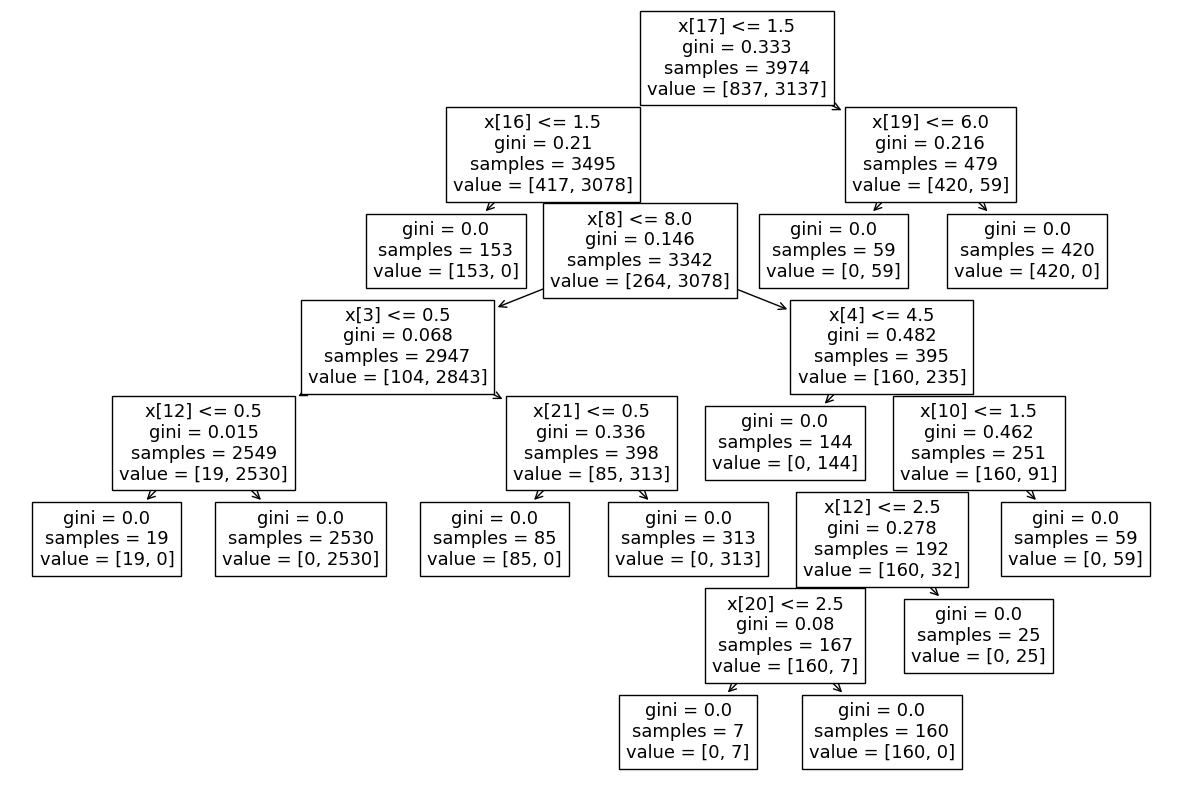

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=42)


# fit the model
clf_gini.fit(X1_train, y1_train)
#Plot the tree
plt.figure(figsize=(15,10))

tree.plot_tree(clf_gini.fit(X1_train, y1_train))

In [ ]:
# Fit the decision tree classifier on the train set
clf_gini.fit(X1_train, y1_train)

# Make predictions on the train set
train_pred_1 = clf_gini.predict(X1_train)

# Make predictions on the test set
test_pred_1 = clf_gini.predict(X1_test)

# Calculate the accuracy of the classifier on the train set
train_acc_1 = accuracy_score(y1_train, train_pred_1)

# Calculate the accuracy of the classifier on the test set
test_acc_1 = accuracy_score(y1_test, test_pred_1)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc_1}")
print(f"Test accuracy: {test_acc_1}")

# Calculate the confusion matrix of the classifier on the test set
conf_mat_1 = confusion_matrix(y1_test, test_pred_1)

# Print the confusion matrix
print(f"Confusion matrix:\n{conf_mat_1}")

Train accuracy: 1.0
Test accuracy: 1.0
Confusion matrix:
[[215   0]
 [  0 779]]


In [ ]:
print(classification_report(y1_test, test_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       779

    accuracy                           1.00       994
   macro avg       1.00      1.00      1.00       994
weighted avg       1.00      1.00      1.00       994



#Trying to select best features by using Random Forest and after that we will update the dataset with best features and then again we will apply decision tree on that...

**Cap Shape:** Describes the shape of the mushroom's cap. Options include bell, conical, convex, flat, knobbed, and sunken.

**Cap Surface:** Indicates the texture of the mushroom's cap surface. Options include fibrous, grooves, scaly, and smooth.

**Cap Color:** Describes the color of the mushroom's cap. Options include various shades of brown, buff, cinnamon, gray, green, pink, purple, red, white, and yellow.

**Bruises:** Indicates whether the mushroom shows bruises when damaged. Options are either bruises present or absent.

**Odor:** Describes the odor of the mushroom. Options include almond, anise, creosote, fishy, foul, musty, none, pungent, and spicy.

**Gill Attachment:** Describes how the mushroom's gills are attached to the stem. Options are attached, descending, free, or notched.

**Gill Spacing:** Indicates the spacing between the gills. Options include close, crowded, or distant.

**Gill Size:** Describes the size of the gills. Options are broad or narrow.

**Gill Color:** Indicates the color of the gills. Options include various shades of black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, and yellow.

**Stalk Shape:** Describes the shape of the mushroom's stalk. Options are enlarging or tapering.

**Stalk Root:** Describes the type of root the mushroom has. Options include bulbous, club, cup, equal, rhizomorphs, rooted, or missing.

**Stalk Surface Above Ring:** Indicates the texture of the stalk's surface above the ring. Options include fibrous, scaly, silky, or smooth.

**Stalk Surface Below Ring:** Indicates the texture of the stalk's surface below the ring. Options include fibrous, scaly, silky, or smooth.

Stalk Color Above Ring: Describes the color of the stalk above the ring. Options include various shades of brown, buff, cinnamon, gray, orange, pink, red, white, and yellow.

Stalk Color Below Ring: Describes the color of the stalk below the ring. Options include various shades of brown, buff, cinnamon, gray, orange, pink, red, white, and yellow.

Veil Type: Indicates the type of veil the mushroom has. Options include partial or universal.

Veil Color: Describes the color of the veil. Options include various shades of brown, orange, white, and yellow.

Ring Number: Indicates the number of rings on the mushroom. Options include none, one, or two.

Ring Type: Describes the type of ring on the mushroom. Options include cobwebby, evanescent, flaring, large, none, pendant, sheathing, or zone.

Spore Print Color: Indicates the color of the mushroom's spore print. Options include various shades of black, brown, buff, chocolate, green, orange, purple, white, and yellow.

Population: Describes the population density of the mushrooms. Options include abundant, clustered, numerous, scattered, several, or solitary.

Habitat: Describes the habitat where the mushrooms are typically found. Options include grasses, leaves, meadows, paths, urban areas, waste areas, or woods.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y1_train)
importances = rf.feature_importances_
threshold = 0.05  # Adjust threshold as needed
sfm = SelectFromModel(rf, threshold=threshold)
sfm.fit(X_train_scaled, y1_train)
X_train_selected_tree = sfm.transform(X_train_scaled)
X_test_selected_tree = sfm.transform(X_test_scaled)
selected_features_indices_tree = sfm.get_support(indices=True)
selected_features_tree = X.columns[selected_features_indices_tree]
print("Feature Importance from Tree-based Models - Selected Features:", selected_features_tree)

Feature Importance from Tree-based Models - Selected Features: Index(['odor', 'gill-size', 'gill-color', 'ring-number', 'spore-print-color',
       'population'],
      dtype='object')


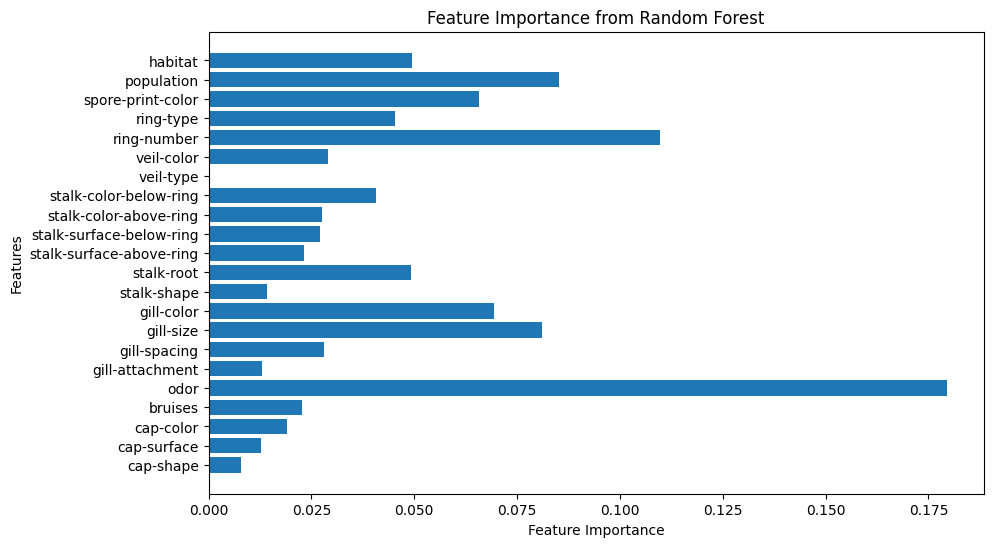

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(np.arange(len(importances)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
X_train_selected_indices_tree = selected_features_indices_tree
X_test_selected_indices_tree = selected_features_indices_tree

In [ ]:
selected_indices_combined =  set(X_train_selected_indices_tree)
X_train_selected = X1_train.iloc[:, list(selected_indices_combined)]
X_test_selected = X1_test.iloc[:, list(selected_indices_combined)]

In [ ]:
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (3974, 6)
Shape of X_test_selected: (994, 6)


[Text(0.6153846153846154, 0.9375, 'x[3] <= 1.5\ngini = 0.333\nsamples = 3974\nvalue = [837, 3137]'),
 Text(0.38461538461538464, 0.8125, 'x[2] <= 4.5\ngini = 0.21\nsamples = 3495\nvalue = [417, 3078]'),
 Text(0.15384615384615385, 0.6875, 'x[2] <= 2.5\ngini = 0.008\nsamples = 2263\nvalue = [9, 2254]'),
 Text(0.07692307692307693, 0.5625, 'gini = 0.0\nsamples = 1775\nvalue = [0, 1775]'),
 Text(0.23076923076923078, 0.5625, 'x[1] <= 0.5\ngini = 0.036\nsamples = 488\nvalue = [9, 479]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 429\nvalue = [0, 429]'),
 Text(0.3076923076923077, 0.4375, 'x[0] <= 5.5\ngini = 0.259\nsamples = 59\nvalue = [9, 50]'),
 Text(0.23076923076923078, 0.3125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.38461538461538464, 0.3125, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.6153846153846154, 0.6875, 'x[0] <= 4.5\ngini = 0.443\nsamples = 1232\nvalue = [408, 824]'),
 Text(0.5384615384615384, 0.5625, 'gini = 0.0\nsamples = 632\nvalue = [0, 632

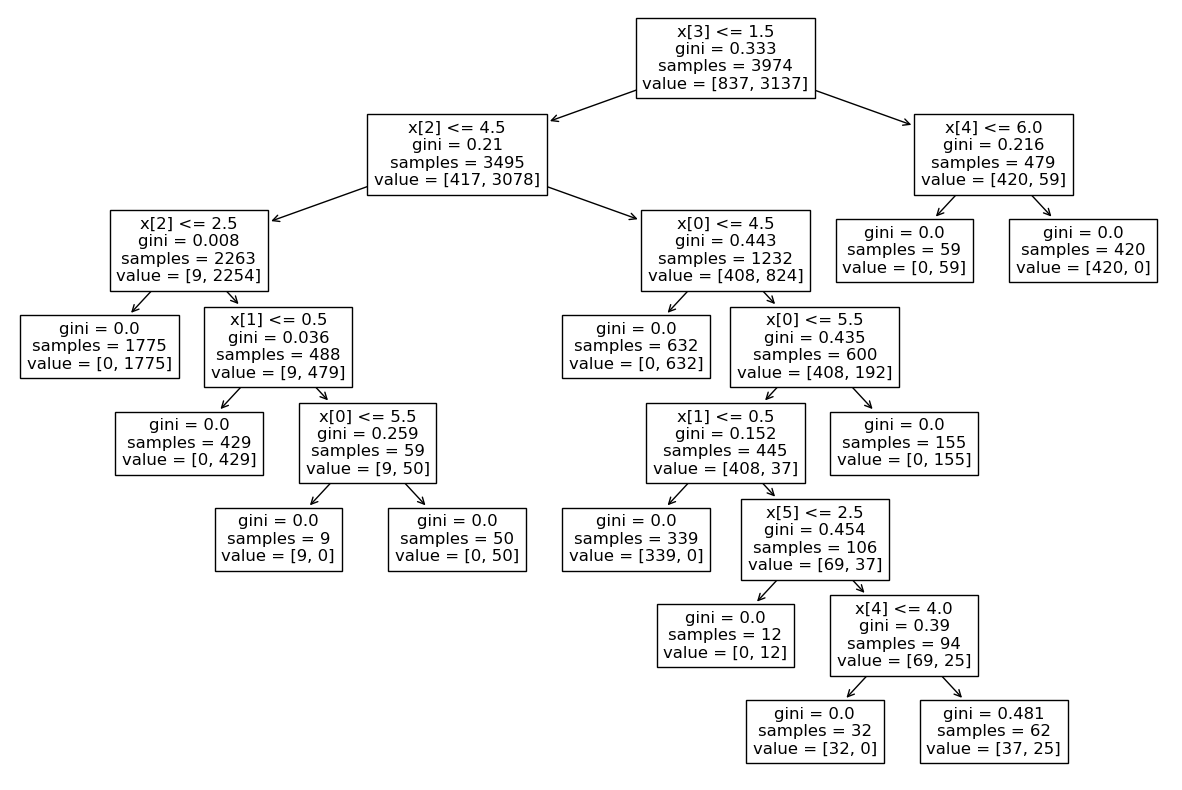

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=42)


# fit the model
clf_gini.fit(X_train_selected, y1_train)
#Plot the tree
plt.figure(figsize=(15,10))

tree.plot_tree(clf_gini.fit(X_train_selected, y1_train))

In [ ]:
# Fit the decision tree classifier on the train set
clf_gini.fit(X_train_selected, y1_train)

# Make predictions on the train set
train_pred_1 = clf_gini.predict(X_train_selected)

# Make predictions on the test set
test_pred_1 = clf_gini.predict(X_test_selected)

# Calculate the accuracy of the classifier on the train set
train_acc_1 = accuracy_score(y1_train, train_pred_1)

# Calculate the accuracy of the classifier on the test set
test_acc_1 = accuracy_score(y1_test, test_pred_1)

# Print the train and test accuracy
print(f"Train accuracy: {train_acc_1}")
print(f"Test accuracy: {test_acc_1}")

# Calculate the confusion matrix of the classifier on the test set
conf_mat_1 = confusion_matrix(y1_test, test_pred_1)

# Print the confusion matrix
print(f"Confusion matrix:\n{conf_mat_1}")

Train accuracy: 0.9937091092098641
Test accuracy: 0.9929577464788732
Confusion matrix:
[[215   0]
 [  7 772]]


In [ ]:
print(classification_report(y1_test, test_pred_1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       215
           1       1.00      0.99      1.00       779

    accuracy                           0.99       994
   macro avg       0.98      1.00      0.99       994
weighted avg       0.99      0.99      0.99       994



#Why???

**Loss of Information:** Decision trees can exploit the information contained in all features to make splits and decisions. Removing some features may lead to a loss of information that the decision tree was previously using to make accurate predictions.

**Complexity Reduction:** Decision trees can grow to be quite complex, especially on datasets with many features. By selecting only the most important features, you might be simplifying the decision tree, which could result in slightly lower accuracy but better generalization to unseen data.

**Sensitivity to Feature Subset:** Decision trees can be sensitive to the subset of features available. If you change the feature subset, the decision tree might learn different decision boundaries, leading to changes in accuracy.

**Feature Importance Consistency:** The feature importance calculated by decision trees can vary depending on the dataset and other factors. If the feature importance changes after selecting a subset of features, the decision tree's behavior and accuracy might also change.

**Data Distribution and Noise:** Removing features can affect the distribution of data seen by the decision tree. If the removed features were noisy or irrelevant, this could improve the decision tree's performance. Conversely, if the removed features contained important information, this could decrease performance.

**Overfitting Reduction:**Decision trees are prone to overfitting, especially on datasets with many features. By selecting only the most important features, you might be reducing overfitting, which could lead to more accurate predictions on unseen data.

In [ ]:
correlation_matrix = df_filtered.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             class  cap-shape  cap-surface  cap-color  \
class                     1.000000   0.180293     0.086462   0.076090   
cap-shape                 0.180293   1.000000    -0.031963   0.041256   
cap-surface               0.086462  -0.031963     1.000000  -0.173149   
cap-color                 0.076090   0.041256    -0.173149   1.000000   
bruises                  -0.274909  -0.092168     0.098134  -0.083310   
odor                     -0.186224  -0.125671     0.264485  -0.262485   
gill-attachment           0.361256   0.100879    -0.015177   0.038038   
gill-spacing             -0.414765  -0.020646    -0.253795   0.114216   
gill-size                 0.390342   0.107838     0.291119  -0.233207   
gill-color               -0.465176  -0.072526    -0.186625   0.184907   
stalk-shape               0.238392  -0.028430     0.292614  -0.449095   
stalk-root                0.205034   0.065443    -0.094759   0.306929   
stalk-surface-above-ring -0.338

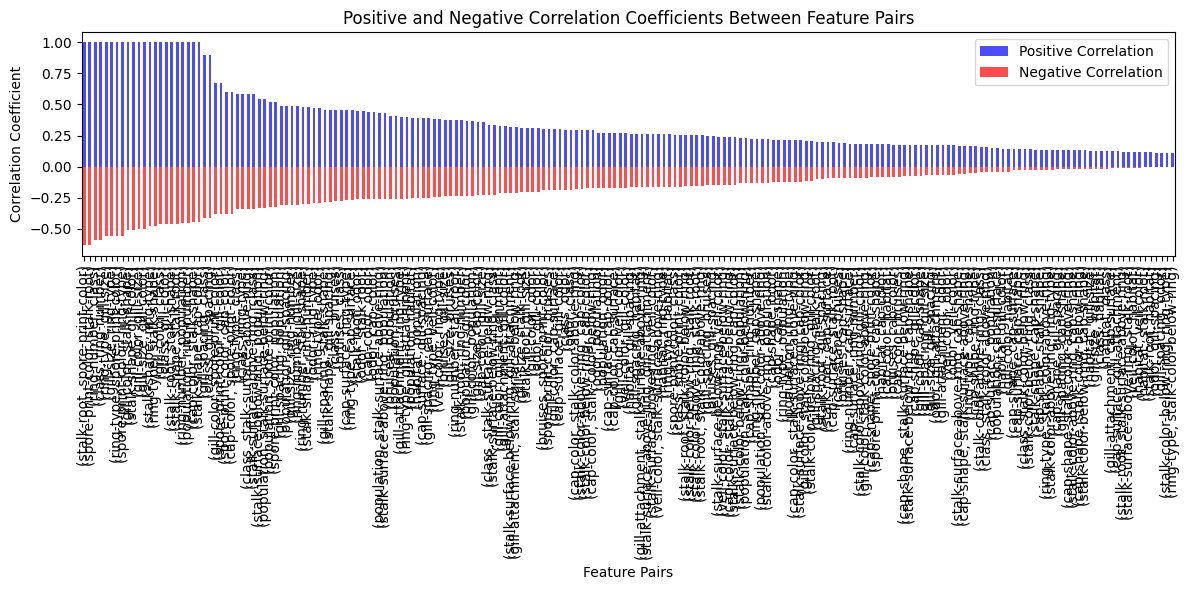

In [ ]:
# Extract the positive and negative correlation coefficients
positive_correlation_values = correlation_matrix.where(correlation_matrix > 0).stack().sort_values(ascending=False)
negative_correlation_values = correlation_matrix.where(correlation_matrix < 0).stack().sort_values(ascending=True)

# Plot the positive correlation values using a bar chart
plt.figure(figsize=(12, 6))
positive_correlation_values.plot(kind='bar', color='b', alpha=0.7, label='Positive Correlation')
negative_correlation_values.plot(kind='bar', color='r', alpha=0.7, label='Negative Correlation')
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation Coefficient')
plt.title('Positive and Negative Correlation Coefficients Between Feature Pairs')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df_filtered.corr()

# Extract the correlation coefficients between 'class' and other features
class_correlation = correlation_matrix['class'].drop('class')  # Remove correlation with itself

# Print the correlation coefficients
print("Correlation between 'class' and other features:")
print(class_correlation)

Correlation between 'class' and other features:
cap-shape                   0.180293
cap-surface                 0.086462
cap-color                   0.076090
bruises                    -0.274909
odor                       -0.186224
gill-attachment             0.361256
gill-spacing               -0.414765
gill-size                   0.390342
gill-color                 -0.465176
stalk-shape                 0.238392
stalk-root                  0.205034
stalk-surface-above-ring   -0.338730
stalk-surface-below-ring   -0.232249
stalk-color-above-ring     -0.045593
stalk-color-below-ring     -0.028555
veil-type                        NaN
veil-color                  0.365487
ring-number                -0.593255
ring-type                  -0.343962
spore-print-color          -0.161849
population                  0.458378
habitat                    -0.017984
Name: class, dtype: float64
